## Implementing Logistic Regression from scratch

In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#### The dataset which used is the heart disease dataset
#### Attribute information
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target- 1 or 0,1 indicates the presence of heart disease, 0 indicates the absense

In [2]:
#import dataset
dataset = pd.read_csv('./heart_disease_dataset.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Check for NaN values
dataset.info()
#No NaN values are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


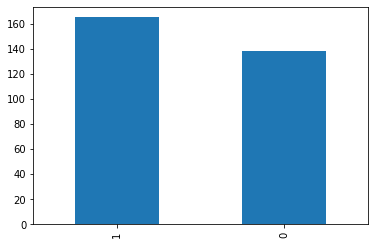

In [4]:
#Lets see the class-wise ratio
dataset['target'].value_counts().plot(kind='bar')

### No high class imbalance

In [37]:
#We use 10 percent data for validation
Y = dataset['target'].values
X = dataset.drop(columns = ['target'],axis = 1).values
X = np.insert(X,0,np.ones(shape=(X.shape[0],)),1)
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.1,random_state=17)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(272, 14)
(272,)
(31, 14)
(31,)


In [59]:
#Define the model parameters and the log-likelihood function
beta = np.zeros(shape=(X.shape[1],1),dtype=float)
def sigmoid(X):
    return 1/(1+np.exp(-X))
def log_likelihood(beta,X,Y):
    return -1*np.sum(Y*np.log(sigmoid(X@beta)) + (1-Y)*np.log(1-sigmoid(X@beta)))
print(log_likelihood(beta,X_train,Y_train))

51281.80100654699


Maximum likelihood estimation for estimating the parameters W
Gradient set to zero (for small datasets we use the Newton Ralphson method, for large ones, we use gradient ascent
Update for Newton Ralphson is given by

$\beta _{k}=\beta _{k-1}-\left ( \frac{\partial ^{2}l(\beta ) }{\partial \beta \partial \beta ^{T}} \right )^{-1}\frac{\partial l(\beta )}{\partial \beta }$

where the derivates are evaluated at $\beta _{k-1}$


In [60]:
num_iters = 10
log_likelihoods = []
betas = []
for i in range(num_iters):
    log_likelihoods.append(log_likelihood(beta,X_train,Y_train))
    betas.append(beta)
    p = sigmoid(X_train@beta)
    W = np.diag(p.reshape(-1)*(1-p.reshape(-1)))
    beta = beta + (np.linalg.inv(X_train.T@(W@X_train))@X_train.T)@(Y_train.reshape(-1,1)-p)

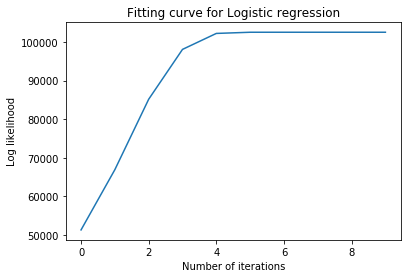

In [61]:
#Plot the log-likelihoods with number of iterations
plt.plot(log_likelihoods)
plt.xlabel('Number of iterations')
plt.ylabel('Log likelihood')
plt.title('Fitting curve for Logistic regression')
plt.show()

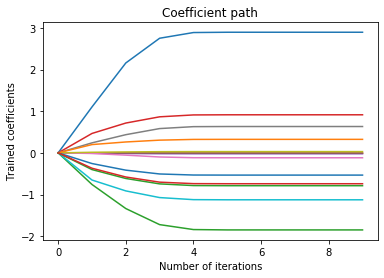

In [72]:
#plot of trained parameters
betas_stacked = np.hstack(betas)
for i in range(betas_stacked.shape[0]):
    plt.plot(betas_stacked[i])
    plt.xlabel('Number of iterations')
    plt.ylabel('Trained coefficients')
    plt.title('Coefficient path')
plt.show()    

In [76]:
#Validation accuracy of this model
predictions = np.round(sigmoid(X_val@beta)).astype(int)
print(accuracy_score(Y_val,predictions.reshape(-1)))

0.7419354838709677
